<a href="https://colab.research.google.com/github/jeffrey-guo-sd/66chuang-dev/blob/master/Pokemon_Type_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
tanishksharma9905_pokemon_data_csv_path = kagglehub.dataset_download('tanishksharma9905/pokemon-data-csv')

print('Data source import complete.')


Data source import complete.


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Creating graphs for statistical analysis
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-data-csv/pokemon_data.csv


In [12]:
df = pd.read_csv("/kaggle/input/pokemon-data-csv/pokemon_data.csv")

plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

print(df.columns)
df.shape

Index(['id', 'name', 'base_experience', 'height', 'weight', 'types',
       'abilities', 'moves', 'stats'],
      dtype='object')


(1302, 9)

In [11]:
df.head()

,id,name,base_experience,height,weight,types,abilities,moves,stats
0,1,bulbasaur,64,7,69,"grass, poison","overgrow, chlorophyll","razor-wind, swords-dance, cut, bind, vine-whip","hp=45, attack=49, defense=49, special-attack=6..."
1,2,ivysaur,142,10,130,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=60, attack=62, defense=63, special-attack=8..."
2,3,venusaur,236,20,1000,"grass, poison","overgrow, chlorophyll","swords-dance, cut, bind, vine-whip, headbutt","hp=80, attack=82, defense=83, special-attack=1..."
3,4,charmander,62,6,85,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=39, attack=52, defense=43, special-attack=6..."
4,5,charmeleon,142,11,190,fire,"blaze, solar-power","mega-punch, fire-punch, thunder-punch, scratch...","hp=58, attack=64, defense=58, special-attack=8..."


In [13]:
print(df.describe(include=['object', 'category']))
print(df.isnull().sum())

                     name   types abilities  \
count                1302    1302      1302   
unique               1302     221       707   
top     terapagos-stellar  normal  levitate   
freq                    1      86        36   

                                                    moves  \
count                                                1268   
unique                                                812   
top     headbutt, tackle, body-slam, take-down, double...   
freq                                                   21   

                                                    stats  
count                                                1302  
unique                                               1142  
top     hp=35, attack=55, defense=40, special-attack=5...  
freq                                                   16  
id                  0
name                0
base_experience     0
height              0
weight              0
types               0
abilities           0
move

In [14]:
# 'Moves' column: Removed as it is not very relevant.
df_processed = df.drop('moves', axis='columns', inplace=False)
print(df_processed.columns)

Index(['id', 'name', 'base_experience', 'height', 'weight', 'types',
       'abilities', 'stats'],
      dtype='object')


In [15]:
# Separating the stats column into its attributes.
def extract_stats(row):
    stats = row.stats.split(", ")
    for stat in stats:
        s, num = stat.split("=")
        row[s] = int(num)
    return row

df_processed = df_processed.apply(extract_stats, axis=1)
df_processed.drop('stats', axis='columns', inplace=True)
print(df_processed.columns)

Index(['id', 'name', 'base_experience', 'height', 'weight', 'types',
       'abilities', 'hp', 'attack', 'defense', 'special-attack',
       'special-defense', 'speed'],
      dtype='object')


0         grass
0        poison
1         grass
1        poison
2         grass
         ...   
1298       fire
1299      grass
1299       rock
1300     normal
1301     normal
Name: type, Length: 2028, dtype: object


<Axes: title={'center': 'Tipos de Pokémon'}, xlabel='type'>

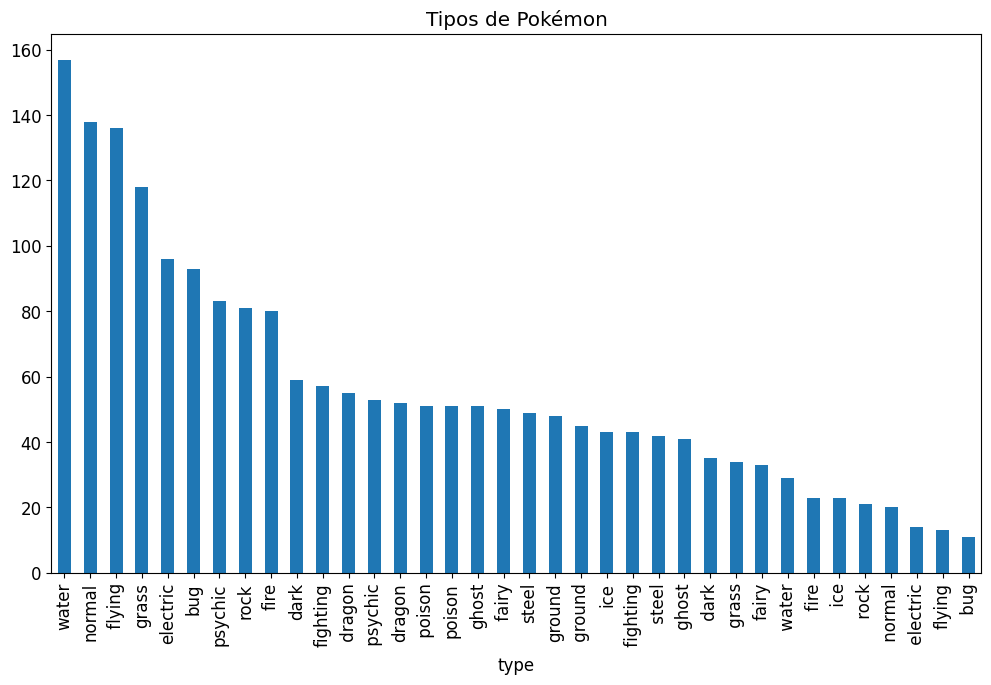

In [16]:
vec_type = df_processed['types'].str.split(',', expand=True)
all_types = vec_type.stack().reset_index(level=1, drop=True).rename('type')
print(all_types)
all_types.value_counts().plot(kind='bar', title='Tipos de Pokémon')